### 1、训练误差与测试误差

In [201]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#print(load_breast_cancer().DESCR)
# X为数据的特征，y为数据的标签
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# 训练与测试
clf = LogisticRegression().fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 对比
train_accuracy = accuracy_score(y_train,y_pred_train)
print("训练正确率:",train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("测试正确率:",test_accuracy)

训练正确率: 0.9647887323943662
测试正确率: 0.9473684210526315


In [128]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

dataset = load_boston()
#print(dataset.DESCR)

# X为数据的特征，y为数据的标签
X,y = dataset.data,dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print("训练集MSE:",MSE_train)
print("测试集MSE:",MSE_test)

训练集MSE: 21.404064817399522
测试集MSE: 23.466806135253098


### 2、欠拟合

In [79]:
#只迭代一次

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# 训练与测试
clf = LogisticRegression(max_iter=1).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 对比
train_accuracy = accuracy_score(y_train,y_pred_train)
print("训练正确率:",train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("测试正确率:",test_accuracy)

训练正确率: 0.8556338028169014
测试正确率: 0.8526315789473684


In [127]:
#只取一个特征

dataset = load_boston()
#print(dataset.DESCR)

# X为数据的特征，y为数据的标签
X,y = dataset.data[:,5:6],dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print("训练集MSE:",MSE_train)
print("测试集MSE:",MSE_test)

训练集MSE: 37.8258787979778
测试集MSE: 53.68557516915286


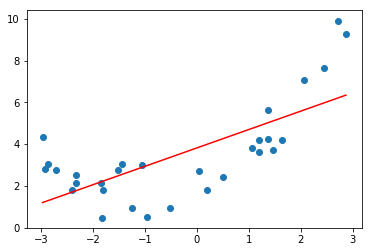

In [134]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=30)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=30)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

plt.show()

### 3、过拟合

In [221]:
#使用最近邻，训练集分类准确率100%

from sklearn.neighbors import KNeighborsClassifier
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# 训练与测试
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 对比
train_accuracy = accuracy_score(y_train,y_pred_train)
print("训练正确率:",train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("测试正确率:",test_accuracy)

训练正确率: 1.0
测试正确率: 0.9122807017543859


In [223]:
# 使用高次回归，训练集误差很小，测试集误差很大
from sklearn.preprocessing import PolynomialFeatures
dataset = load_boston()
#print(dataset.DESCR)

# X为数据的特征，y为数据的标签
X,y = dataset.data,dataset.target
X = PolynomialFeatures(degree=5,interaction_only=True).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print("训练集MSE:",MSE_train)
print("测试集MSE:",MSE_test)

训练集MSE: 1.3937947526190342e-21
测试集MSE: 6934.307389365343


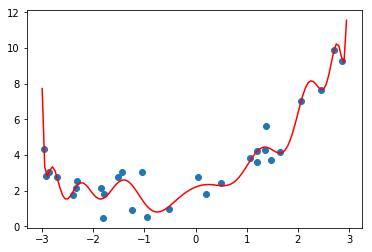

In [262]:
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=30)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=30)

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("lin_reg", LinearRegression())])

lin_reg = PolynomialRegression(18)
lin_reg.fit(X, y)
plt.scatter(x, y)
curve= np.arange(-3,3,0.05).reshape(-1,1)
plt.plot(curve,lin_reg.predict(curve),color='r')

plt.show()

### 4、拟合适当

In [257]:
#使用前5最近邻

from sklearn.neighbors import KNeighborsClassifier
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# 训练与测试
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 对比
train_accuracy = accuracy_score(y_train,y_pred_train)
print("训练正确率:",train_accuracy)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("测试正确率:",test_accuracy)

训练正确率: 0.9330985915492958
测试正确率: 0.9368421052631579


In [260]:
# 使用2次回归
from sklearn.preprocessing import PolynomialFeatures
dataset = load_boston()
#print(dataset.DESCR)

# X为数据的特征，y为数据的标签
X,y = dataset.data,dataset.target
X = PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print("训练集MSE:",MSE_train)
print("测试集MSE:",MSE_test)

训练集MSE: 5.332131909458024
测试集MSE: 18.890466134493657


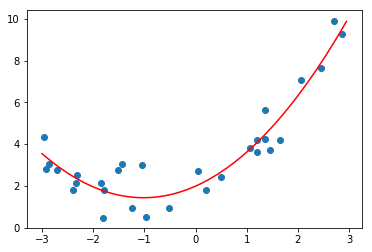

In [264]:
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=30)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=30)

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("lin_reg", LinearRegression())])

lin_reg = PolynomialRegression(2)
lin_reg.fit(X, y)
plt.scatter(x, y)
curve= np.arange(-3,3,0.05).reshape(-1,1)
plt.plot(curve,lin_reg.predict(curve),color='r')

plt.show()